[*********************100%***********************]  1 of 1 completed


NameError: name 'pdf' is not defined

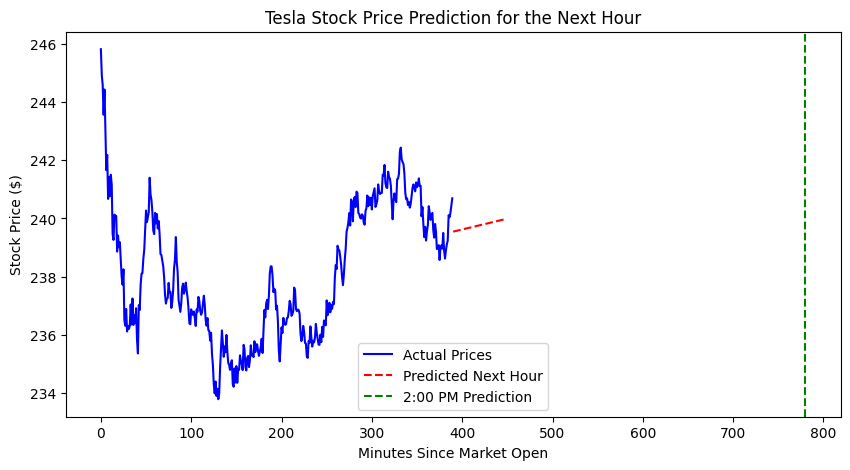

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Fetch today's intraday Tesla stock data (1-minute intervals)
ticker = "TSLA"
data = yf.download(ticker, period="1d", interval="1m")

# Process data
df = data[['Close']].reset_index()
df['Minutes'] = np.arange(len(df))  # Convert time to minutes

# Define Features & Target
X = df[['Minutes']]
y = df['Close']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict Next Hour (Future 60 minutes)
future_minutes = np.array(range(len(df), len(df) + 60)).reshape(-1, 1)
predicted_prices = model.predict(future_minutes)

# Predict Tesla’s price at 2:00 PM (780 minutes from open)
future_time = np.array([[780]])
predicted_price_2pm = model.predict(future_time)[0]

# Create a Visualization
plt.figure(figsize=(10, 5))
plt.plot(df['Minutes'], df['Close'], label="Actual Prices", color="blue")
plt.plot(future_minutes, predicted_prices, label="Predicted Next Hour", linestyle="dashed", color="red")
plt.axvline(780, color="green", linestyle="--", label="2:00 PM Prediction")
plt.xlabel("Minutes Since Market Open")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.title("Tesla Stock Price Prediction for the Next Hour")
plt.savefig("tesla_stock_prediction.png")  # Save as PNG

# Generate PDF Report
()
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, "Tesla Stock Price Prediction Report", ln=True, align="C")
pdf.ln(10)
pdf.cell(200, 10, f"Predicted Tesla Price at 2:00 PM: ${predicted_price_2pm:.2f}", ln=True)
pdf.ln(10)
pdf.image("tesla_stock_prediction.png", x=10, y=50, w=180)
pdf.output("Tesla_Prediction_Report.pdf")
